In [ ]:
# install Anaconda3
!wget -qO ac.sh https://repo.anaconda.com/archive/Anaconda3-2020.07-Linux-x86_64.sh 
!bash ./ac.sh -b

In [ ]:
# a fake google.colab library
!ln -s /usr/local/lib/python3.6/dist-packages/google \
       /root/anaconda3/lib/python3.8/site-packages/google

In [ ]:
# start jupyterlab, which now has Python3 = 3.8
!nohup /root/anaconda3/bin/jupyter-lab --ip=0.0.0.0&

nohup: appending output to 'nohup.out'


In [ ]:
# access through ngrok, click the link
!pip install pyngrok -q
from pyngrok import ngrok
print(ngrok.connect(8888))

NgrokTunnel: "http://6723a3ae4705.ngrok.io" -> "http://localhost:8888"


In [ ]:
import platform
print(platform.python_version())

3.6.9


In [ ]:
pip install ananke-causal

     |████████████████████████████████| 225kB 7.8MB/s 


In [ ]:
from ananke.graphs import ADMG
from ananke.identification import OneLineID
from ananke.estimation import CausalEffect
from ananke.datasets import load_afixable_data
from ananke.estimation import AutomatedIF
import numpy as np
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Case study 3, building the graph

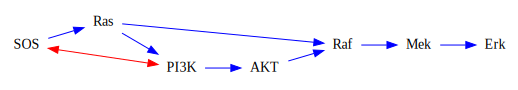

In [ ]:
vertices_case3 = ['SOS', 'Ras','Raf','AKT','Mek','Erk','PI3K']
di_edges_case3 = [('SOS','Ras'), ('Ras','PI3K'),('Ras','Raf'), ('PI3K', 'AKT'),
            ('AKT','Raf'), ('Raf','Mek'),('Mek','Erk')]
bi_edges_case3 = [('SOS','PI3K')]
Case3 = ADMG(vertices_case3, di_edges_case3, bi_edges_case3)
Case3.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=Case3, treatments=['SOS'], outcomes=['Erk'])
one_id.id()

True

In [ ]:
ate_obj_case3 = CausalEffect(graph=Case3, treatment='SOS', outcome='Erk')  # setting up the CausalEffect object
ate_obj_case3


 Treatment is p-fixable and graph is mb-shielded. 

 Available estimators are:

1. Primal IPW (p-ipw)
2. Dual IPW (d-ipw)
3. APIPW (apipw)
4. Efficient APIPW (eff-apipw) 
 
Suggested estimator is Efficient APIPW 



Read observational data:

In [ ]:
obs_data1_case3 = pd.read_csv('obs_data1_case3.csv', sep=',')
obs_data1_case3 = obs_data1_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data2_case3 = pd.read_csv('obs_data2_case3.csv', sep=',')
obs_data2_case3 = obs_data2_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data3_case3 = pd.read_csv('obs_data3_case3.csv', sep=',')
obs_data3_case3 = obs_data3_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data4_case3 = pd.read_csv('obs_data4_case3.csv', sep=',')
obs_data4_case3 = obs_data4_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data5_case3 = pd.read_csv('obs_data5_case3.csv', sep=',')
obs_data5_case3 = obs_data5_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data6_case3 = pd.read_csv('obs_data6_case3.csv', sep=',')
obs_data6_case3 = obs_data6_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data7_case3 = pd.read_csv('obs_data7_case3.csv', sep=',')
obs_data7_case3 = obs_data7_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data8_case3 = pd.read_csv('obs_data8_case3.csv', sep=',')
obs_data8_case3 = obs_data8_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data9_case3 = pd.read_csv('obs_data9_case3.csv', sep=',')
obs_data9_case3 = obs_data9_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data10_case3 = pd.read_csv('obs_data10_case3.csv', sep=',')
obs_data10_case3 = obs_data10_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)

In [ ]:
obs_data_list_case3 = []
obs_data_list_case3.append(obs_data1_case3)
obs_data_list_case3.append(obs_data2_case3)
obs_data_list_case3.append(obs_data3_case3)
obs_data_list_case3.append(obs_data4_case3)
obs_data_list_case3.append(obs_data5_case3)
obs_data_list_case3.append(obs_data6_case3)
obs_data_list_case3.append(obs_data7_case3)
obs_data_list_case3.append(obs_data8_case3)
obs_data_list_case3.append(obs_data9_case3)
obs_data_list_case3.append(obs_data10_case3)

Read interventional data:

In [ ]:
intv_data1_case3 = pd.read_csv('intv_data1_case3.csv', sep=',')
intv_data1_case3 = intv_data1_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data2_case3 = pd.read_csv('intv_data2_case3.csv', sep=',')
intv_data2_case3 = intv_data2_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data3_case3 = pd.read_csv('intv_data3_case3.csv', sep=',')
intv_data3_case3 = intv_data3_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data4_case3 = pd.read_csv('intv_data4_case3.csv', sep=',')
intv_data4_case3 = intv_data4_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data5_case3 = pd.read_csv('intv_data5_case3.csv', sep=',')
intv_data5_case3 = intv_data5_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data6_case3 = pd.read_csv('intv_data6_case3.csv', sep=',')
intv_data6_case3 = intv_data6_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data7_case3 = pd.read_csv('intv_data7_case3.csv', sep=',')
intv_data7_case3 = intv_data7_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data8_case3 = pd.read_csv('intv_data8_case3.csv', sep=',')
intv_data8_case3 = intv_data8_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data9_case3 = pd.read_csv('intv_data9_case3.csv', sep=',')
intv_data9_case3 = intv_data9_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data10_case3 = pd.read_csv('intv_data10_case3.csv', sep=',')
intv_data10_case3 = intv_data10_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)

In [ ]:
intv_data_list_case3 = []
intv_data_list_case3.append(intv_data1_case3)
intv_data_list_case3.append(intv_data2_case3)
intv_data_list_case3.append(intv_data3_case3)
intv_data_list_case3.append(intv_data4_case3)
intv_data_list_case3.append(intv_data5_case3)
intv_data_list_case3.append(intv_data6_case3)
intv_data_list_case3.append(intv_data7_case3)
intv_data_list_case3.append(intv_data8_case3)
intv_data_list_case3.append(intv_data9_case3)
intv_data_list_case3.append(intv_data10_case3)

## absolute average error (AAE)

In [ ]:
means_p_ipw_case3 = [0]*10
means_d_ipw_case3 = [0]*10
means_list_p_ipw_case3 = {}
means_list_d_ipw_case3 = {}
for num_data_points in [30,60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_case3 = abs(intv_data_list_case3[i]['Erk'].mean() - obs_data_list_case3[i]['Erk'].mean())
    data = obs_data_list_case3[i].iloc[0:num_data_points,]
    ace_p_ipw_case3 = ate_obj_case3.compute_effect(data, "p-ipw")
    ace_d_ipw_case3 = ate_obj_case3.compute_effect(data, "d-ipw")
    means_p_ipw_case3[i] = abs(True_case3 - ace_p_ipw_case3)
    means_d_ipw_case3[i] = abs(True_case3 - ace_d_ipw_case3)
  means_list_p_ipw_case3[num_data_points] = (means_p_ipw_case3)
  means_p_ipw_case3 = [0]*10
  means_list_d_ipw_case3[num_data_points] = (means_d_ipw_case3)
  means_d_ipw_case3 = [0]*10

In [ ]:
df_p_ipw_case3 = pd.DataFrame(data = means_list_p_ipw_case3 )
df_d_ipw_case3 = pd.DataFrame(data = means_list_d_ipw_case3 )

In [ ]:
df_p_ipw_case3.to_csv('df_p_ipw_case3.csv')
df_d_ipw_case3.to_csv('df_d_ipw_case3.csv')

# Case Study 4 : Building the graph

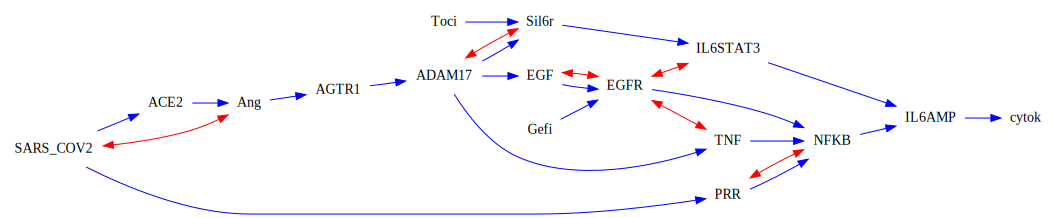

In [ ]:
vertices_case4 = ['SARS_COV2', 'ACE2','Ang','AGTR1','ADAM17','Toci','Sil6r','EGF','TNF','EGFR','PRR','NFKB','IL6STAT3','IL6AMP','cytok','Gefi']
di_edges_case4 = [('SARS_COV2','ACE2'),('ACE2','Ang'),('Ang','AGTR1'),('AGTR1','ADAM17'),('ADAM17','EGF'),('ADAM17','TNF'),('ADAM17','Sil6r'),('SARS_COV2','PRR'),
                  ('PRR','NFKB'),('EGFR','NFKB'),('TNF','NFKB'),('Sil6r','IL6STAT3'),('Toci','Sil6r'),('NFKB','IL6AMP'),('IL6AMP','cytok'),('IL6STAT3','IL6AMP'),('EGF','EGFR'), ('Gefi', 'EGFR')]
bi_edges_case4 = [('SARS_COV2','Ang'), ('ADAM17','Sil6r'),('PRR','NFKB'),
            ('EGF','EGFR'), ('EGFR','TNF'),('EGFR','IL6STAT3')]
Case4 = ADMG(vertices_case4, di_edges_case4, bi_edges_case4)
Case4.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=Case4, treatments=['Sil6r'], outcomes=['cytok'])
one_id.id()

True

In [ ]:
one_id = OneLineID(graph=Case4, treatments=['EGFR'], outcomes=['cytok'])
one_id.id()

True

In [ ]:
ate_obj_case4_sil6r = CausalEffect(graph=Case4, treatment='Sil6r', outcome='cytok')  # setting up the CausalEffect object
ate_obj_case4_sil6r


 Treatment is a-fixable.

 Available estimators are :
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
 
Suggested estimator is Generalized AIPW 



In [ ]:
ate_obj_case4_egfr = CausalEffect(graph=Case4, treatment='EGFR', outcome='cytok')  # setting up the CausalEffect object
ate_obj_case4_egfr


 Treatment is a-fixable.

 Available estimators are :
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
 
Suggested estimator is Generalized AIPW 



In [ ]:
obs_data1_case4 = pd.read_csv('obs_data1_Case4.csv', sep=',')
obs_data2_case4 = pd.read_csv('obs_data2_Case4.csv', sep=',')
obs_data3_case4 = pd.read_csv('obs_data3_Case4.csv', sep=',')
obs_data4_case4 = pd.read_csv('obs_data4_Case4.csv', sep=',')
obs_data5_case4 = pd.read_csv('obs_data5_Case4.csv', sep=',')
obs_data6_case4 = pd.read_csv('obs_data6_Case4.csv', sep=',')
obs_data7_case4 = pd.read_csv('obs_data7_Case4.csv', sep=',')
obs_data8_case4 = pd.read_csv('obs_data8_Case4.csv', sep=',')
obs_data9_case4 = pd.read_csv('obs_data9_Case4.csv', sep=',')
obs_data10_case4 = pd.read_csv('obs_data10_Case4.csv', sep=',')

In [ ]:
obs_data_list_case4 = []
obs_data_list_case4.append(obs_data1_case4)
obs_data_list_case4.append(obs_data2_case4)
obs_data_list_case4.append(obs_data3_case4)
obs_data_list_case4.append(obs_data4_case4)
obs_data_list_case4.append(obs_data5_case4)
obs_data_list_case4.append(obs_data6_case4)
obs_data_list_case4.append(obs_data7_case4)
obs_data_list_case4.append(obs_data8_case4)
obs_data_list_case4.append(obs_data9_case4)
obs_data_list_case4.append(obs_data10_case4)

In [ ]:
intv_data1_case4_sil6r = pd.read_csv('intv_data1_Case4_sil6r.csv', sep=',')
intv_data2_case4_sil6r = pd.read_csv('intv_data2_Case4_sil6r.csv', sep=',')
intv_data3_case4_sil6r = pd.read_csv('intv_data3_Case4_sil6r.csv', sep=',')
intv_data4_case4_sil6r = pd.read_csv('intv_data4_Case4_sil6r.csv', sep=',')
intv_data5_case4_sil6r = pd.read_csv('intv_data5_Case4_sil6r.csv', sep=',')
intv_data6_case4_sil6r = pd.read_csv('intv_data6_Case4_sil6r.csv', sep=',')
intv_data7_case4_sil6r = pd.read_csv('intv_data7_Case4_sil6r.csv', sep=',')
intv_data8_case4_sil6r = pd.read_csv('intv_data8_Case4_sil6r.csv', sep=',')
intv_data9_case4_sil6r = pd.read_csv('intv_data9_Case4_sil6r.csv', sep=',')
intv_data10_case4_sil6r = pd.read_csv('intv_data10_Case4_sil6r.csv', sep=',')

In [ ]:
intv_data_list_case4_sil6r = []
intv_data_list_case4_sil6r.append(intv_data1_case4_sil6r)
intv_data_list_case4_sil6r.append(intv_data2_case4_sil6r)
intv_data_list_case4_sil6r.append(intv_data3_case4_sil6r)
intv_data_list_case4_sil6r.append(intv_data4_case4_sil6r)
intv_data_list_case4_sil6r.append(intv_data5_case4_sil6r)
intv_data_list_case4_sil6r.append(intv_data6_case4_sil6r)
intv_data_list_case4_sil6r.append(intv_data7_case4_sil6r)
intv_data_list_case4_sil6r.append(intv_data8_case4_sil6r)
intv_data_list_case4_sil6r.append(intv_data9_case4_sil6r)
intv_data_list_case4_sil6r.append(intv_data10_case4_sil6r)

In [ ]:
intv_data1_case4_egfr = pd.read_csv('intv_data1_Case4_egfr.csv', sep=',')
intv_data2_case4_egfr = pd.read_csv('intv_data2_Case4_egfr.csv', sep=',')
intv_data3_case4_egfr = pd.read_csv('intv_data3_Case4_egfr.csv', sep=',')
intv_data4_case4_egfr = pd.read_csv('intv_data4_Case4_egfr.csv', sep=',')
intv_data5_case4_egfr = pd.read_csv('intv_data5_Case4_egfr.csv', sep=',')
intv_data6_case4_egfr = pd.read_csv('intv_data6_Case4_egfr.csv', sep=',')
intv_data7_case4_egfr = pd.read_csv('intv_data7_Case4_egfr.csv', sep=',')
intv_data8_case4_egfr = pd.read_csv('intv_data8_Case4_egfr.csv', sep=',')
intv_data9_case4_egfr = pd.read_csv('intv_data9_Case4_egfr.csv', sep=',')
intv_data10_case4_egfr = pd.read_csv('intv_data10_Case4_egfr.csv', sep=',')

In [ ]:
intv_data_list_case4_egfr = []
intv_data_list_case4_egfr.append(intv_data1_case4_egfr)
intv_data_list_case4_egfr.append(intv_data2_case4_egfr)
intv_data_list_case4_egfr.append(intv_data3_case4_egfr)
intv_data_list_case4_egfr.append(intv_data4_case4_egfr)
intv_data_list_case4_egfr.append(intv_data5_case4_egfr)
intv_data_list_case4_egfr.append(intv_data6_case4_egfr)
intv_data_list_case4_egfr.append(intv_data7_case4_egfr)
intv_data_list_case4_egfr.append(intv_data8_case4_egfr)
intv_data_list_case4_egfr.append(intv_data9_case4_egfr)
intv_data_list_case4_egfr.append(intv_data10_case4_egfr)

## absolute average error (AAE)

In [ ]:
#means_ipw_case4_sil6r = [0]*10
#means_list_ipw_case4_sil6r = {}
means_gformula_case4_sil6r = [0]*10
means_list_gformula_case4_sil6r = {}
means_aipw_case4_sil6r = [0]*10
means_list_aipw_case4_sil6r = {}
for num_data_points in [60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_case4 = abs(intv_data_list_case4_sil6r[i]['cytok'].mean() - obs_data_list_case4[i]['cytok'].mean())
    data = obs_data_list_case4[i].iloc[0:num_data_points,]
    #ace_ipw_case4_sil6r = ate_obj_case4_sil6r.compute_effect(data, "ipw")
    #means_ipw_case4_sil6r[i] = abs(True_case4 - ace_ipw_case4_sil6r)
    ace_gformula_case4_sil6r = ate_obj_case4_sil6r.compute_effect(data, "gformula")
    means_gformula_case4_sil6r[i] = abs(True_case4 - ace_gformula_case4_sil6r)
    ace_aipw_case4_sil6r = ate_obj_case4_sil6r.compute_effect(data, "aipw")
    means_aipw_case4_sil6r[i] = abs(True_case4 - ace_aipw_case4_sil6r)
  means_list_gformula_case4_sil6r[num_data_points] = (means_gformula_case4_sil6r)
  means_gformula_case4_sil6r = [0]*10
  means_list_aipw_case4_sil6r[num_data_points] = (means_aipw_case4_sil6r)
  means_aipw_case4_sil6r = [0]*10
  #means_list_ipw_case4_sil6r[num_data_points] = means_ipw_case4_sil6r
  #means_ipw_case4_sil6r = [0]*10

In [ ]:
#means_ipw_case4_egfr = [0]*10
#means_list_ipw_case4_egfr = {}
means_gformula_case4_egfr = [0]*10
means_list_gformula_case4_egfr = {}
means_aipw_case4_egfr = [0]*10
means_list_aipw_case4_egfr = {}
for num_data_points in [60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_case4 = abs(intv_data_list_case4_egfr[i]['cytok'].mean() - obs_data_list_case4[i]['cytok'].mean())
    data = obs_data_list_case4[i].iloc[0:num_data_points,]
    #ace_ipw_case4_egfr = ate_obj_case4_egfr.compute_effect(data, "ipw")
    #means_ipw_case4_egfr[i] = abs(True_case4 - ace_ipw_case4_egfr)
    ace_gformula_case4_egfr = ate_obj_case4_egfr.compute_effect(data, "gformula")
    means_gformula_case4_egfr[i] = abs(True_case4 - ace_gformula_case4_egfr)
    ace_aipw_case4_egfr = ate_obj_case4_egfr.compute_effect(data, "aipw")
    means_aipw_case4_egfr[i] = abs(True_case4 - ace_aipw_case4_egfr)
  means_list_gformula_case4_egfr[num_data_points] = (means_gformula_case4_egfr)
  means_gformula_case4_egfr = [0]*10
  means_list_aipw_case4_egfr[num_data_points] = (means_aipw_case4_egfr)
  means_aipw_case4_egfr = [0]*10
  #means_list_ipw_case4_egfr[num_data_points] = means_ipw_case4_egfr
  #means_ipw_case4_egfr = [0]*10

In [ ]:
#means_list_ipw_case4

In [ ]:
means_list_gformula_case4_egfr

In [ ]:
means_list_aipw_case4_egfr

In [ ]:
df_gformula_case4_sil6r = pd.DataFrame(data = means_list_gformula_case4_sil6r )
df_aipw_case4_sil6r = pd.DataFrame(data = means_list_aipw_case4_sil6r )

In [ ]:
df_gformula_case4_sil6r.to_csv('df_gformula_case4_sil6r.csv')
df_aipw_case4_sil6r.to_csv('df_aipw_case4_sil6r.csv')

In [ ]:
df_gformula_case4_egfr = pd.DataFrame(data = means_list_gformula_case4_egfr )
df_aipw_case4_egfr = pd.DataFrame(data = means_list_aipw_case4_egfr )

In [ ]:
df_gformula_case4_egfr.to_csv('df_gformula_case4_egfr.csv')
df_aipw_case4_egfr.to_csv('df_aipw_case4_egfr.csv')

# Case study 2: Napkin

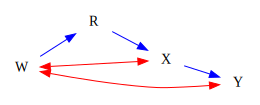

In [ ]:
vertices_case2 = ['W', 'R','X','Y']
di_edges_case2 = [('W','R'), ('R','X'),('X','Y')]
bi_edges_case2 = [('W','X'), ('W','Y')]
Case2 = ADMG(vertices_case2, di_edges_case2, bi_edges_case2)
Case2.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=Case2, treatments=['X'], outcomes=['Y'])
one_id.id()

True

In [ ]:
ate_obj_case2 = CausalEffect(graph=Case2, treatment='X', outcome='Y')  # setting up the CausalEffect object
ate_obj_case2


 Effect is identified. 
 
 Available estimators:
 
1. Nested IPW (n-ipw)
2. Augmented NIPW (anipw) 

Suggested estimator is Augmented NIPW 



In [ ]:
obs_data1_case2 = pd.read_csv('obs_data1_Case2.csv', sep=',')
obs_data2_case2 = pd.read_csv('obs_data2_Case2.csv', sep=',')
obs_data3_case2 = pd.read_csv('obs_data3_Case2.csv', sep=',')
obs_data4_case2 = pd.read_csv('obs_data4_Case2.csv', sep=',')
obs_data5_case2 = pd.read_csv('obs_data5_Case2.csv', sep=',')
obs_data6_case2 = pd.read_csv('obs_data6_Case2.csv', sep=',')
obs_data7_case2 = pd.read_csv('obs_data7_Case2.csv', sep=',')
obs_data8_case2 = pd.read_csv('obs_data8_Case2.csv', sep=',')
obs_data9_case2 = pd.read_csv('obs_data9_Case2.csv', sep=',')
obs_data10_case2 = pd.read_csv('obs_data10_Case2.csv', sep=',')

In [ ]:
obs_data_list_case2 = []
obs_data_list_case2.append(obs_data1_case2)
obs_data_list_case2.append(obs_data2_case2)
obs_data_list_case2.append(obs_data3_case2)
obs_data_list_case2.append(obs_data4_case2)
obs_data_list_case2.append(obs_data5_case2)
obs_data_list_case2.append(obs_data6_case2)
obs_data_list_case2.append(obs_data7_case2)
obs_data_list_case2.append(obs_data8_case2)
obs_data_list_case2.append(obs_data9_case2)
obs_data_list_case2.append(obs_data10_case2)

In [ ]:
intv_data1_case2 = pd.read_csv('intv_data1_Case2.csv', sep=',')
intv_data2_case2 = pd.read_csv('intv_data2_Case2.csv', sep=',')
intv_data3_case2 = pd.read_csv('intv_data3_Case2.csv', sep=',')
intv_data4_case2 = pd.read_csv('intv_data4_Case2.csv', sep=',')
intv_data5_case2 = pd.read_csv('intv_data5_Case2.csv', sep=',')
intv_data6_case2 = pd.read_csv('intv_data6_Case2.csv', sep=',')
intv_data7_case2 = pd.read_csv('intv_data7_Case2.csv', sep=',')
intv_data8_case2 = pd.read_csv('intv_data8_Case2.csv', sep=',')
intv_data9_case2 = pd.read_csv('intv_data9_Case2.csv', sep=',')
intv_data10_case2 = pd.read_csv('intv_data10_Case2.csv', sep=',')

In [ ]:
intv_data_list_case2 = []
intv_data_list_case2.append(intv_data1_case2)
intv_data_list_case2.append(intv_data2_case2)
intv_data_list_case2.append(intv_data3_case2)
intv_data_list_case2.append(intv_data4_case2)
intv_data_list_case2.append(intv_data5_case2)
intv_data_list_case2.append(intv_data6_case2)
intv_data_list_case2.append(intv_data7_case2)
intv_data_list_case2.append(intv_data8_case2)
intv_data_list_case2.append(intv_data9_case2)
intv_data_list_case2.append(intv_data10_case2)

In [ ]:
data = data = obs_data_list_case2[4].iloc[0:30,]
print(data)

    Unnamed: 0              W         R  X          Y  ones
0            1   1.378296e-79 -0.329352  1  -6.639964   1.0
1            2   1.683951e-18  1.932747  1   7.297373   1.0
2            3   8.534126e-47 -8.271979  1  -5.112750   1.0
3            4   1.724157e-77  8.229581  1  -2.742970   1.0
4            5   4.981454e-57 -2.543630  1  -4.916055   1.0
5            6   4.825856e-07 -7.842437  1   5.537752   1.0
6            7   7.696480e-11 -4.985234  1  -4.483434   1.0
7            8  2.827432e-165 -6.242335  1  11.824799   1.0
8            9   4.086296e-13  5.118093  1  -0.978759   1.0
9           10   1.341471e-03  6.735124  1  -1.105171   1.0
10          11   4.080617e-48 -3.280702  1   2.043104   1.0
11          12   4.869063e-19 -3.297838  1  -4.962977   1.0
12          13   1.412291e-49 -3.629094  1   4.246841   1.0
13          14   2.882419e-19 -5.766795  1   1.881130   1.0
14          15   2.905577e-04 -1.238072  1   4.589925   1.0
15          16   9.093690e-52 -1.570001 

In [ ]:
data = data = obs_data_list_case2[3].iloc[0:50,]
ace_n_ipw_case2 = ate_obj_case2.compute_effect(data, "n-ipw")
ace_anipw_case2 = ate_obj_case2.compute_effect(data, "anipw")
ace_n_ipw_case2

/usr/local/lib/python3.7/dist-packages/ananke/estimation/counterfactual_mean.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ones'] = np.ones(len(data))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/ananke/estimation/counterfactual_mean.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

0.3306637394024864

In [ ]:
#means_n_ipw_case2 = [0]*10
#means_list_n_ipw_case2 = {}
means_anipw_case2 = [0]*10
means_list_anipw_case2 = {}

for num_data_points in [40]:
  for i in range(0,10):
  #True causal effect is:
    True_case2 = abs(intv_data_list_case2[i]['Y'].mean() - obs_data_list_case2[i]['Y'].mean())
    data = obs_data_list_case2[i].iloc[0:num_data_points,]
    #ace_n_ipw_case2 = ate_obj_case2.compute_effect(data, "n-ipw")
    #means_n_ipw_case2[i] = abs(True_case2 - ace_n_ipw_case2)
    ace_anipw_case2 = ate_obj_case2.compute_effect(data, "anipw")
    means_anipw_case2[i] = abs(True_case2 - ace_anipw_case2)
  means_list_anipw_case2[num_data_points] = (means_anipw_case2)
  means_anipw_case2 = [0]*10
  #means_list_n_ipw_case2[num_data_points] = means_n_ipw_case2
  #means_n_ipw_case2 = [0]*10

/usr/local/lib/python3.7/dist-packages/ananke/estimation/counterfactual_mean.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ones'] = np.ones(len(data))
/usr/local/lib/python3.7/dist-packages/ananke/estimation/counterfactual_mean.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ones'] = np.ones(len(data))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (

PerfectSeparationError: ignored

## absolute average error (AAE)

In [ ]:
#means_n_ipw_case2 = [0]*10
#means_list_n_ipw_case2 = {}
means_anipw_case2 = [0]*10
means_list_anipw_case2 = {}

for num_data_points in [30,60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_case2 = abs(intv_data_list_case2[i]['Y'].mean() - obs_data_list_case2[i]['Y'].mean())
    data = obs_data_list_case2[i].iloc[0:num_data_points,]
    #ace_n_ipw_case2 = ate_obj_case2.compute_effect(data, "n-ipw")
    #means_n_ipw_case2[i] = abs(True_case2 - ace_n_ipw_case2)
    ace_anipw_case2 = ate_obj_case2.compute_effect(data, "anipw")
    means_anipw_case2[i] = abs(True_case2 - ace_anipw_case2)
  means_list_anipw_case2[num_data_points] = (means_anipw_case2)
  means_anipw_case2 = [0]*10
  #means_list_n_ipw_case2[num_data_points] = means_n_ipw_case2
  #means_n_ipw_case2 = [0]*10

/usr/local/lib/python3.7/dist-packages/ananke/estimation/counterfactual_mean.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ones'] = np.ones(len(data))
/usr/local/lib/python3.7/dist-packages/ananke/estimation/counterfactual_mean.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ones'] = np.ones(len(data))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (

PerfectSeparationError: ignored

It produces error for both of the suggested estimators.

# IGF model

## Complete model



### Build the complete graph

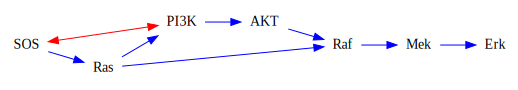

In [ ]:
vertices_IGF_complete = ['SOS', 'Ras','PI3K', 'Raf','AKT','Mek','Erk']
di_edges_IGF_complete = [('SOS','Ras'), ('Ras','PI3K'),('Ras','Raf'), ('PI3K', 'AKT'),
            ('AKT','Raf'), ('Raf','Mek'),('Mek','Erk')]
bi_edges_IGF_complete = [('SOS','PI3K')]
IGF_complete = ADMG(vertices_IGF_complete, di_edges_IGF_complete, bi_edges_IGF_complete)
IGF_complete.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=IGF_complete, treatments=['PI3K'], outcomes=['Erk'])
one_id.id()

True

In [ ]:
ate_obj_IGF_complete = CausalEffect(graph=IGF_complete, treatment='PI3K', outcome='Erk')  # setting up the CausalEffect object
ate_obj_IGF_complete


 Treatment is a-fixable and graph is mb-shielded. 

 Available estimators are:
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
4. Efficient Generalized AIPW (eff-aipw) 
 
Suggested estimator is Efficient Generalized AIPW 



If you'd like to get a sense of what Ananke is doing for each estimator you can use the AutomatedIF class. In the original graph, Ananke is able to find a valid backdoor adjustment set to compute the effect -- SOS and Ras. So the nonparametric IF (np-IF below) has the form of standard Augmented IPW with SOS and Ras as the adjustment set. You can also check that the primal estimator and dual estimator reduces to just the standard IPW estimator and backdoor adjustment estimator as suggested by the prompt from Ananke. So here, it is indeed the case that Mek and Raf are not very crucial to the estimation procedure.

In [ ]:
influence = AutomatedIF(IGF_complete, 'PI3K', 'Erk')
print("beta primal = ", influence.beta_primal_, "\n")
print("beta dual = ", influence.beta_dual_, "\n")
print("np-IF = ", influence.nonparametric_if_, "\n")
print("efficient IF = \n", influence.eff_if_, "\n")


 Treatment is a-fixable and graph is mb-shielded. 

 Available estimators are:
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
4. Efficient Generalized AIPW (eff-aipw) 
 
Suggested estimator is Efficient Generalized AIPW 

beta primal =  I(PI3K=pi3k) x 1/p(PI3K|SOS,Ras) x Erk 

beta dual =  E[Erk|SOS,Ras,PI3K=pi3k] 

np-IF =  I(PI3K=pi3k) x 1/p(PI3K|SOS,Ras) x (Erk - E[Erk|SOS,Ras,PI3K=pi3k]) + E[Erk|SOS,Ras,PI3K=pi3k] - Ψ 

efficient IF = 
 E[βprimal|AKT,PI3K] - E[βprimal|PI3K] + E[βprimal|SOS,Ras] - E[βprimal|SOS] + E[βprimal|Mek,Raf] - E[βprimal|Raf] + E[βprimal|AKT,Raf,Ras] - E[βprimal|AKT,Ras] + E[βprimal|SOS] - E[βprimal] + E[βprimal|Mek,Erk] - E[βprimal|Mek] 



Read observational data:

In [ ]:
obs_data1_case3 = pd.read_csv('obs_data1_case3.csv', sep=',')
obs_data1_case3 = obs_data1_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
binarized_pi3k = np.array([0]*len(obs_data1_case3))
binarized_pi3k[obs_data1_case3["PI3K"] > obs_data1_case3['PI3K'].median()] = 1
obs_data1_case3['PI3K'] = binarized_pi3k

obs_data2_case3 = pd.read_csv('obs_data2_case3.csv', sep=',')
obs_data2_case3 = obs_data2_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
binarized_pi3k = np.array([0]*len(obs_data2_case3))
binarized_pi3k[obs_data2_case3["PI3K"] > obs_data2_case3['PI3K'].median()] = 1
obs_data2_case3['PI3K'] = binarized_pi3k

obs_data3_case3 = pd.read_csv('obs_data3_case3.csv', sep=',')
obs_data3_case3 = obs_data3_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
binarized_pi3k = np.array([0]*len(obs_data3_case3))
binarized_pi3k[obs_data3_case3["PI3K"] > obs_data3_case3['PI3K'].median()] = 1
obs_data3_case3['PI3K'] = binarized_pi3k

obs_data4_case3 = pd.read_csv('obs_data4_case3.csv', sep=',')
obs_data4_case3 = obs_data4_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
binarized_pi3k = np.array([0]*len(obs_data4_case3))
binarized_pi3k[obs_data4_case3["PI3K"] > obs_data4_case3['PI3K'].median()] = 1
obs_data4_case3['PI3K'] = binarized_pi3k

obs_data5_case3 = pd.read_csv('obs_data5_case3.csv', sep=',')
obs_data5_case3 = obs_data5_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
binarized_pi3k = np.array([0]*len(obs_data5_case3))
binarized_pi3k[obs_data5_case3["PI3K"] > obs_data5_case3['PI3K'].median()] = 1
obs_data5_case3['PI3K'] = binarized_pi3k

obs_data6_case3 = pd.read_csv('obs_data6_case3.csv', sep=',')
obs_data6_case3 = obs_data6_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
binarized_pi3k = np.array([0]*len(obs_data6_case3))
binarized_pi3k[obs_data6_case3["PI3K"] > obs_data6_case3['PI3K'].median()] = 1
obs_data6_case3['PI3K'] = binarized_pi3k

obs_data7_case3 = pd.read_csv('obs_data7_case3.csv', sep=',')
obs_data7_case3 = obs_data7_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
binarized_pi3k = np.array([0]*len(obs_data7_case3))
binarized_pi3k[obs_data7_case3["PI3K"] > obs_data7_case3['PI3K'].median()] = 1
obs_data7_case3['PI3K'] = binarized_pi3k

obs_data8_case3 = pd.read_csv('obs_data8_case3.csv', sep=',')
obs_data8_case3 = obs_data8_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data9_case3 = pd.read_csv('obs_data9_case3.csv', sep=',')
obs_data9_case3 = obs_data9_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
obs_data10_case3 = pd.read_csv('obs_data10_case3.csv', sep=',')
obs_data10_case3 = obs_data10_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
obs_data_list_case3 = []
obs_data_list_case3.append(obs_data1_case3)
obs_data_list_case3.append(obs_data2_case3)
obs_data_list_case3.append(obs_data3_case3)
obs_data_list_case3.append(obs_data4_case3)
obs_data_list_case3.append(obs_data5_case3)
obs_data_list_case3.append(obs_data6_case3)
obs_data_list_case3.append(obs_data7_case3)
obs_data_list_case3.append(obs_data8_case3)
obs_data_list_case3.append(obs_data9_case3)
obs_data_list_case3.append(obs_data10_case3)

Read interventional data:

In [ ]:
intv_data1_case3 = pd.read_csv('intv_data1_case3.csv', sep=',')
intv_data1_case3 = intv_data1_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data2_case3 = pd.read_csv('intv_data2_case3.csv', sep=',')
intv_data2_case3 = intv_data2_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data3_case3 = pd.read_csv('intv_data3_case3.csv', sep=',')
intv_data3_case3 = intv_data3_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data4_case3 = pd.read_csv('intv_data4_case3.csv', sep=',')
intv_data4_case3 = intv_data4_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data5_case3 = pd.read_csv('intv_data5_case3.csv', sep=',')
intv_data5_case3 = intv_data5_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data6_case3 = pd.read_csv('intv_data6_case3.csv', sep=',')
intv_data6_case3 = intv_data6_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data7_case3 = pd.read_csv('intv_data7_case3.csv', sep=',')
intv_data7_case3 = intv_data7_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data8_case3 = pd.read_csv('intv_data8_case3.csv', sep=',')
intv_data8_case3 = intv_data8_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data9_case3 = pd.read_csv('intv_data9_case3.csv', sep=',')
intv_data9_case3 = intv_data9_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)
intv_data10_case3 = pd.read_csv('intv_data10_case3.csv', sep=',')
intv_data10_case3 = intv_data10_case3.drop(['Unnamed: 0','EGFR','IGFR'], axis=1)

In [ ]:
intv_data_list_case3 = []
intv_data_list_case3.append(intv_data1_case3)
intv_data_list_case3.append(intv_data2_case3)
intv_data_list_case3.append(intv_data3_case3)
intv_data_list_case3.append(intv_data4_case3)
intv_data_list_case3.append(intv_data5_case3)
intv_data_list_case3.append(intv_data6_case3)
intv_data_list_case3.append(intv_data7_case3)
intv_data_list_case3.append(intv_data8_case3)
intv_data_list_case3.append(intv_data9_case3)
intv_data_list_case3.append(intv_data10_case3)

## absolute average error (AAE)

In [ ]:
#1. IPW (ipw)
#2. Outcome regression (gformula)
#3. Generalized AIPW (aipw)
#4. Efficient Generalized AIPW (eff-aipw) 
means_ipw_IGF_complete = [0]*10
means_d_ipw_IGF_complete = [0]*10
means_p_ipw_IGF_complete = [0]*10
means_gformula_IGF_complete = [0]*10
means_aipw_IGF_complete = [0]*10
means_eff_aipw_IGF_complete = [0]*10
means_list_ipw_IGF_complete = {}
means_list_d_ipw_IGF_complete = {}
means_list_p_ipw_IGF_complete = {}
means_list_gformula_IGF_complete = {}
means_list_aipw_IGF_complete = {}
means_list_eff_aipw_IGF_complete = {}
for num_data_points in [30,60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_IGF_complete = abs(intv_data_list_case3[i]['Erk'].mean() - obs_data_list_case3[i]['Erk'].mean())
    data = obs_data_list_case3[i].iloc[0:num_data_points,]
    ace_ipw_IGF_complete = ate_obj_IGF_complete.compute_effect(data, "ipw")
    ace_d_ipw_IGF_complete = ate_obj_IGF_complete.compute_effect(data, "d-ipw")
    ace_p_ipw_IGF_complete = ate_obj_IGF_complete.compute_effect(data, "p-ipw")
    ace_gformula_IGF_complete = ate_obj_IGF_complete.compute_effect(data, "gformula")
    ace_aipw_IGF_complete = ate_obj_IGF_complete.compute_effect(data, "aipw")
    #ace_eff_aipw_IGF_complete = ate_obj_IGF_complete.compute_effect(data, "eff-aipw")
    means_ipw_IGF_complete[i] = abs(True_IGF_complete - ace_ipw_IGF_complete)
    means_d_ipw_IGF_complete[i] = abs(True_IGF_complete - ace_d_ipw_IGF_complete)
    means_p_ipw_IGF_complete[i] = abs(True_IGF_complete - ace_p_ipw_IGF_complete)
    means_gformula_IGF_complete[i] = abs(True_IGF_complete - ace_gformula_IGF_complete)
    means_aipw_IGF_complete[i] = abs(True_IGF_complete - ace_aipw_IGF_complete)
    #means_eff_aipw_IGF_complete[i] = abs(True_IGF_complete - ace_aipw_IGF_complete)
  means_list_ipw_IGF_complete[num_data_points] = (means_ipw_IGF_complete)
  means_ipw_IGF_complete = [0]*10
  means_list_d_ipw_IGF_complete[num_data_points] = (means_d_ipw_IGF_complete)
  means_d_ipw_IGF_complete = [0]*10
  means_list_p_ipw_IGF_complete[num_data_points] = (means_p_ipw_IGF_complete)
  means_p_ipw_IGF_complete = [0]*10
  means_list_gformula_IGF_complete[num_data_points] = (means_gformula_IGF_complete)
  means_gformula_IGF_complete = [0]*10
  means_list_aipw_IGF_complete[num_data_points] = (means_aipw_IGF_complete)
  means_aipw_IGF_complete = [0]*10
  #means_list_eff_aipw_IGF_complete[num_data_points] = (means_eff_aipw_IGF_complete)
  #means_eff_aipw_IGF_complete = [0]*10

In [ ]:
df_ipw_IGF_complete = pd.DataFrame(data = means_list_ipw_IGF_complete )
df_p_ipw_IGF_complete = pd.DataFrame(data = means_list_p_ipw_IGF_complete )
df_d_ipw_IGF_complete = pd.DataFrame(data = means_list_d_ipw_IGF_complete )
df_gformula_IGF_complete = pd.DataFrame(data = means_list_gformula_IGF_complete )
df_aipw_IGF_complete = pd.DataFrame(data = means_list_aipw_IGF_complete )
df_eff_aipw_IGF_complete = pd.DataFrame(data = means_list_eff_aipw_IGF_complete )

In [ ]:
df_ipw_IGF_complete

,30,60,100,140,200
0,0.492602,0.268633,1.058095,1.131055,0.615851
1,0.345704,2.117641,1.750564,71.105288,14.547530
2,0.074442,0.012395,0.425209,0.603406,0.516242
3,0.123176,0.073777,2.340060,0.005522,2.036088
4,0.804048,2.399488,4.539957,6.650082,1.493597
5,0.128611,0.088442,0.229108,0.072060,0.253429
6,1.572020,0.084568,0.419266,0.458372,0.906198
7,0.118964,0.012195,0.436638,0.108109,1.029301
8,0.825873,0.297901,0.522634,0.109342,0.240264
9,0.006592,0.018734,0.091704,0.251280,0.056813


In [ ]:
#df_p_ipw_case3.to_csv('df_p_ipw_case3.csv')
#df_d_ipw_case3.to_csv('df_d_ipw_case3.csv')


## Simplified model : Build graph 1

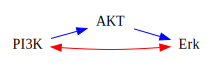

In [ ]:
vertices_IGF_1 = ['AKT','PI3K','Erk']
di_edges_IGF_1 = [('PI3K','AKT'),('AKT','Erk')]
bi_edges_IGF_1 = [('PI3K','Erk')]
IGF_1 = ADMG(vertices_IGF_1, di_edges_IGF_1, bi_edges_IGF_1)
IGF_1.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=IGF_1, treatments=['PI3K'], outcomes=['Erk'])
one_id.id()

True

In [ ]:
ate_obj_IGF_1 = CausalEffect(graph=IGF_1, treatment='PI3K', outcome='Erk')  # setting up the CausalEffect object
ate_obj_IGF_1


 Treatment is p-fixable and graph is mb-shielded. 

 Available estimators are:

1. Primal IPW (p-ipw)
2. Dual IPW (d-ipw)
3. APIPW (apipw)
4. Efficient APIPW (eff-apipw) 
 
Suggested estimator is Efficient APIPW 



In [ ]:
influence = AutomatedIF(IGF_1, 'PI3K', 'Erk')
print("beta primal = ", influence.beta_primal_, "\n")
print("beta dual = ", influence.beta_dual_, "\n")
print("np-IF = ", influence.nonparametric_if_, "\n")
print("efficient IF = \n", influence.eff_if_, "\n")


 Treatment is p-fixable and graph is mb-shielded. 

 Available estimators are:

1. Primal IPW (p-ipw)
2. Dual IPW (d-ipw)
3. APIPW (apipw)
4. Efficient APIPW (eff-apipw) 
 
Suggested estimator is Efficient APIPW 

beta primal =  I(PI3K=pi3k) x 1/[p(PI3K)] x Σ_PI3K p(PI3K) x E[Erk|AKT,PI3K] 

beta dual =  [p(AKT|PI3K=pi3k)/p(AKT|PI3K)] x Erk 

np-IF =  E[βprimal|AKT,PI3K] - E[βprimal|PI3K] + E[βdual|PI3K] - E[βdual] + E[βdual|AKT,Erk,PI3K] - E[βdual|PI3K,AKT] 

efficient IF = 
 E[βprimal|AKT,PI3K] - E[βprimal|PI3K] + E[βdual|PI3K] - E[βdual] + E[βdual|AKT,Erk,PI3K] - E[βdual|PI3K,AKT] 



## absolute average error (AAE)

In [ ]:
#1. Primal IPW (p-ipw)
#2. Dual IPW (d-ipw)
#3. APIPW (apipw)
#4. Efficient APIPW (eff-apipw)
means_p_ipw_IGF_1 = [0]*10
means_d_ipw_IGF_1 = [0]*10
means_apipw_IGF_1 = [0]*10
means_eff_apipw_IGF_1 = [0]*10
means_list_p_ipw_IGF_1 = {}
means_list_d_ipw_IGF_1 = {}
means_list_apipw_IGF_1 = {}
means_list_eff_apipw_IGF_1 = {}
for num_data_points in [30,60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_IGF_1 = abs(intv_data_list_case3[i]['Erk'].mean() - obs_data_list_case3[i]['Erk'].mean())
    data = obs_data_list_case3[i].iloc[0:num_data_points,]
    #data = data.drop(['SOS', 'Ras', 'Raf','Mek'], axis=1)
    
    ace_p_ipw_IGF_1 = ate_obj_IGF_1.compute_effect(data, "p-ipw")
    ace_d_ipw_IGF_1 = ate_obj_IGF_1.compute_effect(data, "d-ipw")
    #ace_apipw_IGF_1 = ate_obj_IGF_1.compute_effect(data, "apipw")
    #ace_eff_apipw_IGF_1 = ate_obj_IGF_1.compute_effect(data, "eff-apipw")
   
    means_p_ipw_IGF_1[i] = abs(True_IGF_1 - ace_p_ipw_IGF_1)
    means_d_ipw_IGF_1[i] = abs(True_IGF_1 - ace_d_ipw_IGF_1)
    #means_apipw_IGF_1[i] = abs(True_IGF_1 - ace_apipw_IGF_1)
    #means_eff_apipw_IGF_1[i] = abs(True_IGF_1 - ace_eff_apipw_IGF_1)

  means_list_p_ipw_IGF_1[num_data_points] = (means_p_ipw_IGF_1)
  means_p_ipw_IGF_1 = [0]*10
  means_list_d_ipw_IGF_1[num_data_points] = (means_d_ipw_IGF_1)
  means_d_ipw_IGF_1 = [0]*10
  #means_list_apipw_IGF_1[num_data_points] = (means_apipw_IGF_1)
  #means_apipw_IGF_1 = [0]*10
  #means_list_eff_apipw_IGF_1[num_data_points] = (means_apipw_IGF_1)
  #means_eff_apipw_IGF_1 = [0]*10

In [ ]:
df_p_ipw_IGF_1 = pd.DataFrame(data = means_list_p_ipw_IGF_1)
df_d_ipw_IGF_1 = pd.DataFrame(data = means_list_d_ipw_IGF_1)
#df_apipw_IGF_1 = pd.DataFrame(data = means_list_apipw_IGF_1)
#df_eff_apipw_IGF_1 = pd.DataFrame(data = means_list_eff_apipw_IGF_1)

In [ ]:
df_d_ipw_IGF_1

,30,60,100,140,200
0,0.492602,0.268633,1.058095,1.131055,0.615851
1,0.345704,2.117641,1.750564,71.105288,14.547530
2,0.074442,0.012395,0.425209,0.603406,0.516242
3,0.123176,0.073777,2.340060,0.005522,2.036088
4,0.804048,2.399488,4.539957,6.650082,1.493597
5,0.128611,0.088442,0.229108,0.072060,0.253429
6,1.572020,0.084568,0.419266,0.458372,0.906198
7,0.118964,0.012195,0.436638,0.108109,1.029301
8,0.825873,0.297901,0.522634,0.109342,0.240264
9,0.006592,0.018734,0.091704,0.251280,0.056813


In [ ]:
df_d_ipw_IGF_complete

,30,60,100,140,200
0,0.492602,0.268633,1.058095,1.131055,0.615851
1,0.345704,2.117641,1.750564,71.105288,14.547530
2,0.074442,0.012395,0.425209,0.603406,0.516242
3,0.123176,0.073777,2.340060,0.005522,2.036088
4,0.804048,2.399488,4.539957,6.650082,1.493597
5,0.128611,0.088442,0.229108,0.072060,0.253429
6,1.572020,0.084568,0.419266,0.458372,0.906198
7,0.118964,0.012195,0.436638,0.108109,1.029301
8,0.825873,0.297901,0.522634,0.109342,0.240264
9,0.006592,0.018734,0.091704,0.251280,0.056813


## Build graph 2

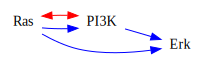

In [ ]:
vertices_IGF_2 = ['Ras','PI3K','Erk']
di_edges_IGF_2 = [('PI3K','Erk'),('Ras','Erk'),('Ras','PI3K')]
bi_edges_IGF_2 = [('PI3K','Ras')]
IGF_2 = ADMG(vertices_IGF_2, di_edges_IGF_2, bi_edges_IGF_2)
IGF_2.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=IGF_2, treatments=['PI3K'], outcomes=['Erk'])
one_id.id()

True

In [ ]:
ate_obj_IGF_2 = CausalEffect(graph=IGF_2, treatment='PI3K', outcome='Erk')  # setting up the CausalEffect object
ate_obj_IGF_2


 Treatment is a-fixable and graph is mb-shielded. 

 Available estimators are:
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
4. Efficient Generalized AIPW (eff-aipw) 
 
Suggested estimator is Efficient Generalized AIPW 



In [ ]:
influence = AutomatedIF(IGF_2, 'PI3K', 'Erk')
print("beta primal = ", influence.beta_primal_, "\n")
print("beta dual = ", influence.beta_dual_, "\n")
print("np-IF = ", influence.nonparametric_if_, "\n")
print("efficient IF = \n", influence.eff_if_, "\n")


 Treatment is a-fixable and graph is mb-shielded. 

 Available estimators are:
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
4. Efficient Generalized AIPW (eff-aipw) 
 
Suggested estimator is Efficient Generalized AIPW 

beta primal =  I(PI3K=pi3k) x 1/p(PI3K|Ras) x Erk 

beta dual =  E[Erk|Ras,PI3K=pi3k] 

np-IF =  I(PI3K=pi3k) x 1/p(PI3K|Ras) x (Erk - E[Erk|Ras,PI3K=pi3k]) + E[Erk|Ras,PI3K=pi3k] - Ψ 

efficient IF = 
 I(PI3K=pi3k) x 1/p(PI3K|Ras) x (Erk - E[Erk|Ras,PI3K=pi3k]) + E[Erk|Ras,PI3K=pi3k] - Ψ 



## absolute average error (AAE)

In [ ]:
#1. IPW (ipw)
#2. Outcome regression (gformula)
#3. Generalized AIPW (aipw)
#4. Efficient Generalized AIPW (eff-aipw) 
means_p_ipw_IGF_2 = [0]*10
means_d_ipw_IGF_2 = [0]*10
means_aipw_IGF_2 = [0]*10
means_eff_aipw_IGF_2 = [0]*10
means_list_p_ipw_IGF_2 = {}
means_list_d_ipw_IGF_2 = {}
means_list_aipw_IGF_2 = {}
means_list_eff_aipw_IGF_2 = {}
for num_data_points in [30,60,100,140,200]:
  for i in range(0,10):
  #True causal effect is:
    True_IGF_2 = abs(intv_data_list_case3[i]['Erk'].mean() - obs_data_list_case3[i]['Erk'].mean())
    data = obs_data_list_case3[i].iloc[0:num_data_points,]
    #data = data.drop(['SOS', 'AKT', 'Raf','Mek'], axis=1)
    ace_p_ipw_IGF_2 = ate_obj_IGF_2.compute_effect(data, "p-ipw")
    ace_d_ipw_IGF_2 = ate_obj_IGF_2.compute_effect(data, "d-ipw")
    #ace_aipw_IGF_2 = ate_obj_IGF_2.compute_effect(data, "aipw")
    #ace_eff_aipw_IGF_2 = ate_obj_IGF_2.compute_effect(data, "eff-aipw")
    means_p_ipw_IGF_2[i] = abs(True_IGF_2 - ace_p_ipw_IGF_2)
    means_d_ipw_IGF_2[i] = abs(True_IGF_2 - ace_d_ipw_IGF_2)
    #means_aipw_IGF_2[i] = abs(True_IGF_2 - ace_aipw_IGF_2)
    #means_eff_aipw_IGF_2[i] = abs(True_IGF_2 - ace_eff_aipw_IGF_2)
  means_list_p_ipw_IGF_2[num_data_points] = (means_p_ipw_IGF_2)
  means_p_ipw_IGF_2 = [0]*10
  means_list_d_ipw_IGF_2[num_data_points] = (means_d_ipw_IGF_2)
  means_d_ipw_IGF_2 = [0]*10
  #means_list_aipw_IGF_2[num_data_points] = (means_aipw_IGF_2)
  #means_aipw_IGF_2 = [0]*10
  #means_list_eff_aipw_IGF_2[num_data_points] = (means_aipw_IGF_2)
  #means_eff_aipw_IGF_2 = [0]*10

In [ ]:
df_p_ipw_IGF_2 = pd.DataFrame(data = means_list_p_ipw_IGF_2)
df_d_ipw_IGF_2 = pd.DataFrame(data = means_list_d_ipw_IGF_2)
#df_apipw_IGF_2 = pd.DataFrame(data = means_list_apipw_IGF_2)
#df_eff_apipw_IGF_2 = pd.DataFrame(data = means_list_eff_apipw_IGF_2)

In [ ]:
df_d_ipw_IGF_2

,30,60,100,140,200
0,0.142045,0.144565,0.176001,0.216930,0.208558
1,0.264202,0.243194,0.229595,0.229497,0.202959
2,0.005009,0.082427,0.064626,0.069417,0.098225
3,0.201509,0.019858,0.090418,0.150451,0.116483
4,0.261476,0.249549,0.267557,0.264356,0.247785
5,0.122549,0.212747,0.189479,0.190696,0.190401
6,0.092470,0.066745,0.132290,0.093357,0.068903
7,0.059720,0.080354,0.142517,0.124914,0.131993
8,0.164571,0.047726,0.031918,0.031442,0.090515
9,0.086046,0.024095,0.008499,0.005219,0.011716


In [ ]:
df_d_ipw_IGF_1

,30,60,100,140,200
0,0.492602,0.268633,1.058095,1.131055,0.615851
1,0.345704,2.117641,1.750564,71.105288,14.547530
2,0.074442,0.012395,0.425209,0.603406,0.516242
3,0.123176,0.073777,2.340060,0.005522,2.036088
4,0.804048,2.399488,4.539957,6.650082,1.493597
5,0.128611,0.088442,0.229108,0.072060,0.253429
6,1.572020,0.084568,0.419266,0.458372,0.906198
7,0.118964,0.012195,0.436638,0.108109,1.029301
8,0.825873,0.297901,0.522634,0.109342,0.240264
9,0.006592,0.018734,0.091704,0.251280,0.056813


In [ ]:
df_d_ipw_IGF_complete

,30,60,100,140,200
0,0.492602,0.268633,1.058095,1.131055,0.615851
1,0.345704,2.117641,1.750564,71.105288,14.547530
2,0.074442,0.012395,0.425209,0.603406,0.516242
3,0.123176,0.073777,2.340060,0.005522,2.036088
4,0.804048,2.399488,4.539957,6.650082,1.493597
5,0.128611,0.088442,0.229108,0.072060,0.253429
6,1.572020,0.084568,0.419266,0.458372,0.906198
7,0.118964,0.012195,0.436638,0.108109,1.029301
8,0.825873,0.297901,0.522634,0.109342,0.240264
9,0.006592,0.018734,0.091704,0.251280,0.056813


In [ ]:
ace_ipw_IGF_complete = ate_obj_IGF_complete.compute_effect(obs_data1_case3, "ipw")
ace_p_ipw_IGF_complete = ate_obj_IGF_complete.compute_effect(obs_data1_case3, "p-ipw")
ace_d_ipw_IGF_complete = ate_obj_IGF_complete.compute_effect(obs_data1_case3, "d-ipw")
ace_gformula_IGF_complete = ate_obj_IGF_complete.compute_effect(obs_data1_case3, "gformula")
ace_aipw_IGF_complete = ate_obj_IGF_complete.compute_effect(obs_data1_case3, "aipw")
ace_eff_aipw_IGF_complete = ate_obj_IGF_complete.compute_effect(obs_data1_case3, "eff-aipw")

In [ ]:
ace_eff_aipw_IGF_complete

0.38734997843870644

In [ ]:
ace_p_ipw_IGF_1 = ate_obj_IGF_1.compute_effect(obs_data1_case3, "p-ipw")
ace_d_ipw_IGF_1 = ate_obj_IGF_1.compute_effect(obs_data1_case3, "d-ipw")
ace_apipw_IGF_1 = ate_obj_IGF_1.compute_effect(obs_data1_case3, "apipw")
ace_eff_apipw_IGF_1 = ate_obj_IGF_1.compute_effect(obs_data1_case3, "eff-apipw")

In [ ]:
ace_apipw_IGF_1

-0.6539750882113822

In [ ]:
ace_p_ipw_IGF_2 = ate_obj_IGF_2.compute_effect(obs_data1_case3, "p-ipw")
ace_d_ipw_IGF_2 = ate_obj_IGF_2.compute_effect(obs_data1_case3, "d-ipw")
ace_aipw_IGF_2 = ate_obj_IGF_2.compute_effect(obs_data1_case3, "aipw")
ace_eff_aipw_IGF_2 = ate_obj_IGF_2.compute_effect(obs_data1_case3, "eff-aipw")

In [ ]:
ace_eff_aipw_IGF_2

0.38293312196327634

# Model 12 from crash course

## Complete model where none of variables is latent

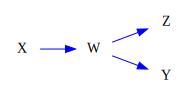

In [ ]:
vertices_model12 = ['X','W','Z','Y']
di_edges_model12 = [('X','W'),('W','Y'),('W','Z')]
bi_edges_model12 = []
model12 = ADMG(vertices_model12, di_edges_model12, bi_edges_model12)
model12.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=model12, treatments=['X'], outcomes=['Y'])
one_id.id()

True

In [ ]:
ate_obj_model12 = CausalEffect(graph=model12, treatment='X', outcome='Y')  # setting up the CausalEffect object
ate_obj_model12


 Treatment is a-fixable and graph is mb-shielded. 

 Available estimators are:
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
4. Efficient Generalized AIPW (eff-aipw) 
 
Suggested estimator is Efficient Generalized AIPW 



## Read observational and interventional data

In [ ]:
obs_data1_model12 = pd.read_csv('data_model12.csv', sep=',')
obs_data1_model12 = obs_data1_model12.drop(['Unnamed: 0'], axis=1)
obs_data1_model12

In [ ]:
intv_data1_model12 = pd.read_csv('intv_data_model12.csv', sep=',')
intv_data1_model12 = intv_data1_model12.drop(['Unnamed: 0'], axis=1)
intv_data1_model12

## absolute average error (AAE)

In [ ]:
#1. IPW (ipw)
#2. Outcome regression (gformula)
#3. Generalized AIPW (aipw)
#4. Efficient Generalized AIPW (eff-aipw) 
means_list_ipw_model12 = {}
means_list_gformula_model12 = {}
means_list_aipw_model12 = {}
for num_data_points in [30,60,100]:
  for i in range(0,1):
  #True causal effect is:
    True_model12 = abs(intv_data1_model12['Y'].mean() - obs_data1_model12['Y'].mean()) 
    data = obs_data1_model12.iloc[0:num_data_points,] 
    ace_ipw_model12 = ate_obj_model12.compute_effect(data, "ipw")
    ace_gformula_model12 = ate_obj_model12.compute_effect(data, "gformula")
    ace_aipw_model12 = ate_obj_model12.compute_effect(data, "aipw")
    #ace_eff_aipw_model12 = ate_obj_model12.compute_effect(data, "eff-aipw")
    means_ipw_model12 = abs(True_model12 - ace_ipw_model12)
    means_gformula_model12 = abs(True_model12 - ace_gformula_model12)
    means_aipw_model12 = abs(True_model12 - ace_aipw_model12)
    #means_eff_aipw_model12 = abs(True_model12 - ace_eff_aipw_model12)
  means_list_ipw_model12[num_data_points] = (means_ipw_model12)
  means_ipw_model12 = [0]*10
  means_list_gformula_model12[num_data_points] = (means_gformula_model12)
  means_gformula_model12 = [0]*10
  means_list_aipw_model12[num_data_points] = (means_aipw_model12)
  means_aipw_model12 = [0]*10
  #means_list_eff_aipw_model12[num_data_points] = (means_eff_aipw_model12)
  #means_eff_aipw_model12 = [0]*10

In [ ]:
means_list_ipw_model12

{30: 0.7669961288421567, 60: 0.7669961288421567, 100: 0.7669961288421567}

In [ ]:
means_list_gformula_model12

{30: 0.553316246675723, 60: 0.8148650028481504, 100: 0.8474760923397946}

In [ ]:
means_list_aipw_model12

{30: 0.553316246675723, 60: 0.8148650028481504, 100: 0.8474760923397946}

## Model where Z is latent

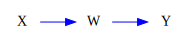

In [ ]:
vertices_model12_Z = ['X','W','Y']
di_edges_model12_Z = [('X','W'),('W','Y')]
bi_edges_model12_Z = []
model12_Z = ADMG(vertices_model12_Z, di_edges_model12_Z, bi_edges_model12_Z)
model12_Z.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=model12_Z, treatments=['X'], outcomes=['Y'])
one_id.id()

In [ ]:
ate_obj_model12_Z = CausalEffect(graph=model12_Z, treatment='X', outcome='Y')  # setting up the CausalEffect object
ate_obj_model12_Z


 Treatment is a-fixable and graph is mb-shielded. 

 Available estimators are:
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
4. Efficient Generalized AIPW (eff-aipw) 
 
Suggested estimator is Efficient Generalized AIPW 



## Read observational and interventional data

In [ ]:
obs_data1_model12_Z = pd.read_csv('data_model12.csv', sep=',')
obs_data1_model12_Z = obs_data1_model12_Z.drop(['Unnamed: 0', 'Z'], axis=1)
obs_data1_model12_Z

In [ ]:
intv_data1_model12_Z = pd.read_csv('intv_data_model12.csv', sep=',')
intv_data1_model12_Z = intv_data1_model12_Z.drop(['Unnamed: 0', 'Z'], axis=1)
intv_data1_model12_Z

,X,W,Y
0,2,5.835308,-0.995560
1,2,-2.907741,-5.404562
2,2,8.949206,4.533478
3,2,-6.641087,-4.330706
4,2,-2.210953,11.871467
...,...,...,...
95,2,1.353520,8.820406
96,2,6.450999,0.010759
97,2,5.527190,-3.577217
98,2,-2.955690,-2.381202


## absolute average error (AAE)

In [ ]:
#1. IPW (ipw)
#2. Outcome regression (gformula)
#3. Generalized AIPW (aipw)
#4. Efficient Generalized AIPW (eff-aipw) 
means_list_ipw_model12_Z = {}
means_list_gformula_model12_Z = {}
means_list_aipw_model12_Z = {}
for num_data_points in [30,60,100]:
  for i in range(0,1):
  #True causal effect is:
    True_model12 = abs(intv_data1_model12_Z['Y'].mean() - obs_data1_model12_Z['Y'].mean()) 
    data = obs_data1_model12_Z.iloc[0:num_data_points,] 
    ace_ipw_model12_Z = ate_obj_model12_Z.compute_effect(data, "ipw")
    ace_gformula_model12_Z = ate_obj_model12_Z.compute_effect(data, "gformula")
    ace_aipw_model12_Z = ate_obj_model12_Z.compute_effect(data, "aipw")
    #ace_eff_aipw_model12_Z = ate_obj_model12_Z.compute_effect(data, "eff-aipw")
    means_ipw_model12_Z = abs(True_model12 - ace_ipw_model12_Z)
    means_gformula_model12_Z = abs(True_model12 - ace_gformula_model12_Z)
    means_aipw_model12_Z = abs(True_model12 - ace_aipw_model12_Z)
    #means_eff_aipw_model12_Z = abs(True_model12 - ace_eff_aipw_model12_Z)
  means_list_ipw_model12_Z[num_data_points] = (means_ipw_model12_Z)
  means_ipw_model12_Z = [0]*10
  means_list_gformula_model12_Z[num_data_points] = (means_gformula_model12_Z)
  means_gformula_model12_Z = [0]*10
  means_list_aipw_model12_Z[num_data_points] = (means_aipw_model12_Z)
  means_aipw_model12_Z = [0]*10
  #means_list_eff_aipw_model12[num_data_points] = (means_eff_aipw_model12)
  #means_eff_aipw_model12 = [0]*10

In [ ]:
means_list_ipw_model12_Z

{30: 0.7669961288421567, 60: 0.7669961288421567, 100: 0.7669961288421567}

In [ ]:
means_list_gformula_model12_Z

{30: 0.553316246675723, 60: 0.8148650028481504, 100: 0.8474760923397946}

In [ ]:
means_list_aipw_model12_Z

{30: 0.553316246675723, 60: 0.8148650028481504, 100: 0.8474760923397946}

## Model where Z and W are latent

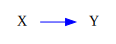

In [ ]:
vertices_model12_Z_W = ['X','Y']
di_edges_model12_Z_W = [('X','Y')]
bi_edges_model12_Z_W = []
model12_Z_W = ADMG(vertices_model12_Z_W, di_edges_model12_Z_W, bi_edges_model12_Z_W)
model12_Z_W.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=model12_Z_W, treatments=['X'], outcomes=['Y'])
one_id.id()

True

In [ ]:
ate_obj_model12_Z_W = CausalEffect(graph=model12_Z_W, treatment='X', outcome='Y')  # setting up the CausalEffect object
ate_obj_model12_Z_W


 Treatment is a-fixable and graph is mb-shielded. 

 Available estimators are:
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
4. Efficient Generalized AIPW (eff-aipw) 
 
Suggested estimator is Efficient Generalized AIPW 



## Read observational and interventional data

In [ ]:
obs_data1_model12_Z_W = pd.read_csv('data_model12.csv', sep=',')
obs_data1_model12_Z_W = obs_data1_model12_Z_W.drop(['Unnamed: 0', 'Z','W'], axis=1)
obs_data1_model12_Z_W

,X,Y
0,7.488056,1.949436
1,2.242227,0.968959
2,9.356395,3.698133
3,0.002219,2.199578
4,2.660300,2.882404
...,...,...
95,4.798983,7.427720
96,7.857470,7.746035
97,7.303185,-0.062358
98,2.213457,3.406025


In [ ]:
intv_data1_model12_Z_W = pd.read_csv('intv_data_model12.csv', sep=',')
intv_data1_model12_Z_W = intv_data1_model12_Z_W.drop(['Unnamed: 0', 'Z','W'], axis=1)
intv_data1_model12_Z_W

,X,Y
0,2,-0.995560
1,2,-5.404562
2,2,4.533478
3,2,-4.330706
4,2,11.871467
...,...,...
95,2,8.820406
96,2,0.010759
97,2,-3.577217
98,2,-2.381202


##absolute average error (AAE)

In [ ]:
#1. IPW (ipw)
#2. Outcome regression (gformula)
#3. Generalized AIPW (aipw)
#4. Efficient Generalized AIPW (eff-aipw) 
means_list_ipw_model12_Z_W = {}
means_list_gformula_model12_Z_W = {}
means_list_aipw_model12_Z_W = {}
for num_data_points in [30,60,100]:
  for i in range(0,1):
  #True causal effect is:
    True_model12 = abs(intv_data1_model12_Z_W['Y'].mean() - obs_data1_model12_Z_W['Y'].mean()) 
    data = obs_data1_model12_Z_W.iloc[0:num_data_points,] 
    ace_ipw_model12_Z_W = ate_obj_model12_Z_W.compute_effect(data, "ipw")
    ace_gformula_model12_Z_W = ate_obj_model12_Z_W.compute_effect(data, "gformula")
    ace_aipw_model12_Z_W = ate_obj_model12_Z_W.compute_effect(data, "aipw")
    #ace_eff_aipw_model12_Z_W = ate_obj_model12_Z_W.compute_effect(data, "eff-aipw")
    means_ipw_model12_Z_W = abs(True_model12 - ace_ipw_model12_Z_W)
    means_gformula_model12_Z_W = abs(True_model12 - ace_gformula_model12_Z_W)
    means_aipw_model12_Z_W = abs(True_model12 - ace_aipw_model12_Z_W)
    #means_eff_aipw_model12_Z_W = abs(True_model12 - ace_eff_aipw_model12_Z_W)
  means_list_ipw_model12_Z_W[num_data_points] = (means_ipw_model12_Z_W)
  means_ipw_model12_Z_W = [0]*10
  means_list_gformula_model12_Z_W[num_data_points] = (means_gformula_model12_Z_W)
  means_gformula_model12_Z_W = [0]*10
  means_list_aipw_model12_Z_W[num_data_points] = (means_aipw_model12_Z_W)
  means_aipw_model12_Z_W = [0]*10
  #means_list_eff_aipw_model12_Z_W[num_data_points] = (means_eff_aipw_model12_Z_W)
  #means_eff_aipw_model12_Z_W = [0]*10

In [ ]:
means_list_ipw_model12_Z_W

{30: 0.7669961288421567, 60: 0.7669961288421567, 100: 0.7669961288421567}

In [ ]:
means_list_gformula_model12_Z_W

{30: 0.553316246675723, 60: 0.8148650028481504, 100: 0.8474760923397946}

In [ ]:
means_list_aipw_model12_Z_W

{30: 0.553316246675723, 60: 0.8148650028481504, 100: 0.8474760923397946}

# Model 13 from crash course

## Complete model where none of variables are latent

According to causal fusion, **The causal effect of X on Y is: P(Y|X)**.

Z and W are not part of the formula. We will experiment the value of causal effect when none of the variables are latent, then we will experiment the case where Z is latent, finally we will experiment the case where both Z and W are latent. The result shows that there are no difference in the ACE value in any of the experiments.

**Controlling for Z** here could mean including Z in a regression equation, using Z in you inverse probability weighting, or matching using Z etc. 

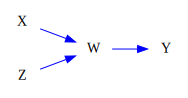

In [ ]:
vertices_model13 = ['X','W','Z','Y']
di_edges_model13 = [('X','W'),('W','Y'),('Z','W')]
bi_edges_model13 = []
model13 = ADMG(vertices_model13, di_edges_model13, bi_edges_model13)
model13.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=model13, treatments=['X'], outcomes=['Y'])
one_id.id()

True

In [ ]:
ate_obj_model13 = CausalEffect(graph=model13, treatment='X', outcome='Y')  # setting up the CausalEffect object
ate_obj_model13


 Treatment is a-fixable and graph is mb-shielded. 

 Available estimators are:
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
4. Efficient Generalized AIPW (eff-aipw) 
 
Suggested estimator is Efficient Generalized AIPW 



## Read observational and interventional data

In [ ]:
obs_data1_model13 = pd.read_csv('data_model13.csv', sep=',')
obs_data1_model13 = obs_data1_model13.drop(['Unnamed: 0'], axis=1)
obs_data1_model13

In [ ]:
intv_data1_model13 = pd.read_csv('intv_data_model13.csv', sep=',')
intv_data1_model13 = intv_data1_model13.drop(['Unnamed: 0'], axis=1)
intv_data1_model13

## absolute average error (AAE)

In [ ]:
#1. IPW (ipw)
#2. Outcome regression (gformula)
#3. Generalized AIPW (aipw)
#4. Efficient Generalized AIPW (eff-aipw) 
means_list_ipw_model13 = {}
means_list_gformula_model13 = {}
means_list_aipw_model13 = {}
for num_data_points in [30,60,100]:
  for i in range(0,1):
  #True causal effect is:
    True_model13 = abs(intv_data1_model13['Y'].mean() - obs_data1_model13['Y'].mean()) 
    data = obs_data1_model13.iloc[0:num_data_points,] 
    ace_ipw_model13 = ate_obj_model13.compute_effect(data, "ipw")
    ace_gformula_model13 = ate_obj_model13.compute_effect(data, "gformula")
    ace_aipw_model13 = ate_obj_model13.compute_effect(data, "aipw")
    #ace_eff_aipw_model13 = ate_obj_model13.compute_effect(data, "eff-aipw")
    means_ipw_model13 = abs(True_model13 - ace_ipw_model13)
    means_gformula_model13 = abs(True_model13 - ace_gformula_model13)
    means_aipw_model13 = abs(True_model13 - ace_aipw_model13)
    #means_eff_aipw_model13 = abs(True_model13 - ace_eff_aipw_model13)
  means_list_ipw_model13[num_data_points] = (means_ipw_model13)
  means_ipw_model13 = [0]*10
  means_list_gformula_model13[num_data_points] = (means_gformula_model13)
  means_gformula_model13 = [0]*10
  means_list_aipw_model13[num_data_points] = (means_aipw_model13)
  means_aipw_model13 = [0]*10
  #means_list_eff_aipw_model13[num_data_points] = (means_eff_aipw_model13)
  #means_eff_aipw_model13 = [0]*10

In [ ]:
means_list_ipw_model13

{30: 1.108590037746429, 60: 1.108590037746429, 100: 1.108590037746429}

In [ ]:
means_list_gformula_model13

{30: 0.9357261847181149, 60: 1.1984605192405169, 100: 1.2272205650522579}

In [ ]:
means_list_aipw_model13

{30: 0.9357261847181149, 60: 1.1984605192405169, 100: 1.2272205650522579}

## Model 13 where Z is latent

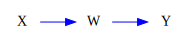

In [ ]:
vertices_model13_Z = ['X','W','Y']
di_edges_model13_Z = [('X','W'),('W','Y')]
bi_edges_model13_Z = []
model13_Z = ADMG(vertices_model13_Z, di_edges_model13_Z, bi_edges_model13_Z)
model13_Z.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=model13_Z, treatments=['X'], outcomes=['Y'])
one_id.id()

True

In [ ]:
ate_obj_model13_Z = CausalEffect(graph=model13_Z, treatment='X', outcome='Y')  # setting up the CausalEffect object
ate_obj_model13_Z


 Treatment is a-fixable and graph is mb-shielded. 

 Available estimators are:
 
1. IPW (ipw)
2. Outcome regression (gformula)
3. Generalized AIPW (aipw)
4. Efficient Generalized AIPW (eff-aipw) 
 
Suggested estimator is Efficient Generalized AIPW 



## Read observational and interventional data

In [ ]:
obs_data1_model13_Z = pd.read_csv('data_model13.csv', sep=',')
obs_data1_model13_Z = obs_data1_model13_Z.drop(['Unnamed: 0', 'Z'], axis=1)
obs_data1_model13_Z

,X,W,Y
0,7.488056,-1.015500,1.413741
1,2.242227,-5.300607,0.895562
2,9.356395,4.527068,3.557825
3,0.002219,-4.228825,1.528054
4,2.660300,12.257303,3.061662
...,...,...,...
95,4.798983,8.595491,8.414159
96,7.857470,-0.054654,7.550533
97,7.303185,-3.557347,-0.869868
98,2.213457,-2.354857,3.435747


In [ ]:
intv_data1_model13_Z = pd.read_csv('intv_data_model13.csv', sep=',')
intv_data1_model13_Z = intv_data1_model13_Z.drop(['Unnamed: 0', 'Z'], axis=1)
intv_data1_model13_Z

,X,W,Y
0,2,6.055316,3.667027
1,2,-2.817648,-1.103245
2,2,9.343265,7.077737
3,2,-6.385869,3.506689
4,2,-1.902270,4.605871
...,...,...,...
95,2,1.350916,-8.552368
96,2,6.605671,2.032878
97,2,5.820570,5.183049
98,2,-2.934295,-5.376728


## absolute average error (AAE)

In [ ]:
#1. IPW (ipw)
#2. Outcome regression (gformula)
#3. Generalized AIPW (aipw)
#4. Efficient Generalized AIPW (eff-aipw) 
means_list_ipw_model13_Z = {}
means_list_gformula_model13_Z = {}
means_list_aipw_model13_Z = {}
for num_data_points in [30,60,100]:
  for i in range(0,1):
  #True causal effect is:
    True_model13_Z = abs(intv_data1_model13_Z['Y'].mean() - obs_data1_model13_Z['Y'].mean()) 
    data = obs_data1_model13_Z.iloc[0:num_data_points,] 
    ace_ipw_model13_Z = ate_obj_model13_Z.compute_effect(data, "ipw")
    ace_gformula_model13_Z = ate_obj_model13_Z.compute_effect(data, "gformula")
    ace_aipw_model13_Z= ate_obj_model13_Z.compute_effect(data, "aipw")
    #ace_eff_aipw_model13_Z = ate_obj_model13_Z.compute_effect(data, "eff-aipw")
    means_ipw_model13_Z = abs(True_model13_Z - ace_ipw_model13_Z)
    means_gformula_model13_Z = abs(True_model13_Z - ace_gformula_model13_Z)
    means_aipw_model13_Z = abs(True_model13_Z - ace_aipw_model13_Z)
    #means_eff_aipw_model13_Z = abs(True_model13_Z - ace_eff_aipw_model13_Z)
  means_list_ipw_model13_Z[num_data_points] = (means_ipw_model13_Z)
  means_ipw_model13_Z = [0]*10
  means_list_gformula_model13_Z[num_data_points] = (means_gformula_model13_Z)
  means_gformula_model13_Z = [0]*10
  means_list_aipw_model13_Z[num_data_points] = (means_aipw_model13_Z)
  means_aipw_model13_Z= [0]*10
  #means_list_eff_aipw_model13_Z[num_data_points] = (means_eff_aipw_model13_Z)
  #means_eff_aipw_model13_Z = [0]*10

In [ ]:
means_list_ipw_model13_Z

{30: 1.108590037746429, 60: 1.108590037746429, 100: 1.108590037746429}

In [ ]:
means_list_gformula_model13_Z

{30: 0.9357261847181149, 60: 1.1984605192405169, 100: 1.2272205650522579}

In [ ]:
means_list_aipw_model13_Z

{30: 0.9357261847181149, 60: 1.1984605192405169, 100: 1.2272205650522579}

## Model 13 where Z and W are latent

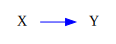

In [ ]:
vertices_model13_Z_W = ['X','Y']
di_edges_model13_Z_W = [('X','Y')]
bi_edges_model13_Z_W = []
model13_Z_W = ADMG(vertices_model13_Z_W, di_edges_model13_Z_W, bi_edges_model13_Z_W)
model13_Z_W.draw(direction='LR')

In [ ]:
one_id = OneLineID(graph=model13_Z_W, treatments=['X'], outcomes=['Y'])
one_id.id()

In [ ]:
ate_obj_model13_Z_W = CausalEffect(graph=model13_Z_W, treatment='X', outcome='Y')  # setting up the CausalEffect object
ate_obj_model13_Z_W

## Read observational and interventional data

In [ ]:
obs_data1_model13_Z_W = pd.read_csv('data_model13.csv', sep=',')
obs_data1_model13_Z_W = obs_data1_model13_Z_W.drop(['Unnamed: 0', 'Z', 'W'], axis=1)
obs_data1_model13_Z_W

,X,Y
0,7.488056,1.413741
1,2.242227,0.895562
2,9.356395,3.557825
3,0.002219,1.528054
4,2.660300,3.061662
...,...,...
95,4.798983,8.414159
96,7.857470,7.550533
97,7.303185,-0.869868
98,2.213457,3.435747


In [ ]:
intv_data1_model13_Z_W = pd.read_csv('intv_data_model13.csv', sep=',')
intv_data1_model13_Z_W = intv_data1_model13_Z_W.drop(['Unnamed: 0', 'Z','W'], axis=1)
intv_data1_model13_Z_W

## absolute average error (AAE)

In [ ]:
#1. IPW (ipw)
#2. Outcome regression (gformula)
#3. Generalized AIPW (aipw)
#4. Efficient Generalized AIPW (eff-aipw) 
means_list_ipw_model13_Z_W = {}
means_list_gformula_model13_Z_W = {}
means_list_aipw_model13_Z_W = {}
for num_data_points in [30,60,100]:
  for i in range(0,1):
  #True causal effect is:
    True_model13_Z_W = abs(intv_data1_model13_Z_W['Y'].mean() - obs_data1_model13_Z_W['Y'].mean()) 
    data = obs_data1_model13_Z_W.iloc[0:num_data_points,] 
    ace_ipw_model13_Z_W = ate_obj_model13_Z_W.compute_effect(data, "ipw")
    ace_gformula_model13_Z_W = ate_obj_model13_Z_W.compute_effect(data, "gformula")
    ace_aipw_model13_Z_W = ate_obj_model13_Z_W.compute_effect(data, "aipw")
    #ace_eff_aipw_model13_Z_W = ate_obj_model13_Z_W.compute_effect(data, "eff-aipw")
    means_ipw_model13_Z_W = abs(True_model13_Z_W - ace_ipw_model13_Z_W)
    means_gformula_model13_Z_W = abs(True_model13_Z_W - ace_gformula_model13_Z_W)
    means_aipw_model13_Z_W = abs(True_model13_Z_W - ace_aipw_model13_Z_W)
    #means_eff_aipw_model13_Z_W = abs(True_model13_Z_W - ace_eff_aipw_model13_Z_W)
  means_list_ipw_model13_Z_W[num_data_points] = (means_ipw_model13_Z_W)
  means_ipw_model13_Z_W = [0]*10
  means_list_gformula_model13_Z_W[num_data_points] = (means_gformula_model13_Z_W)
  means_gformula_model13_Z_W = [0]*10
  means_list_aipw_model13_Z_W[num_data_points] = (means_aipw_model13_Z_W)
  means_aipw_model13_Z_W = [0]*10
  #means_list_eff_aipw_model13_Z_W[num_data_points] = (means_eff_aipw_model13_Z_W)
  #means_eff_aipw_model13_Z_W = [0]*10

In [ ]:
means_list_ipw_model13_Z_W

{30: 1.108590037746429, 60: 1.108590037746429, 100: 1.108590037746429}

In [ ]:
means_list_gformula_model13_Z_W

{30: 0.9357261847181149, 60: 1.1984605192405169, 100: 1.2272205650522579}

In [ ]:
means_list_aipw_model13_Z_W

{30: 0.9357261847181149, 60: 1.1984605192405169, 100: 1.2272205650522579}